In [71]:
#ejemplo de modelo no supervisado PCA
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [73]:
df_vinos = pd.read_csv('winequality.csv')
df_vinos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [103]:
df_vinos_blanco = df_vinos[df_vinos['type'] == 'white']
white = df_vinos_blanco.drop('type', axis=1)

In [77]:
df_vinos_blanco = df_vinos_blanco.drop('quality', axis= 1)

In [79]:
X = df_vinos_blanco.drop('type', axis=1)

In [81]:
X.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              8
residual sugar           2
chlorides                5
free sulfur dioxide      4
total sulfur dioxide     0
density                  3
pH                      11
sulphates                2
alcohol                  3
dtype: int64

In [85]:
nulos = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for columna in nulos:
   X[ X[columna].isna() ] = X[columna].mean()    

In [87]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [89]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.00000,0.27000,0.36000,20.70000,0.04500,45.00000,170.00000,1.00100,3.00000,0.45000,8.80000
1,6.30000,0.30000,0.34000,1.60000,0.04900,14.00000,132.00000,0.99400,3.30000,0.49000,9.50000
2,8.10000,0.28000,0.40000,6.90000,0.05000,30.00000,97.00000,0.99510,3.26000,0.44000,10.10000
3,7.20000,0.23000,0.32000,8.50000,0.05800,47.00000,186.00000,0.99560,3.19000,0.40000,9.90000
4,7.20000,0.23000,0.32000,8.50000,0.05800,47.00000,186.00000,0.99560,3.19000,0.40000,9.90000
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.20000,0.21000,0.29000,1.60000,0.03900,24.00000,92.00000,0.99114,3.27000,0.50000,11.20000
4894,6.60000,0.32000,0.36000,8.00000,0.04700,57.00000,168.00000,0.99490,3.15000,0.46000,9.60000
4895,0.29158,0.29158,0.29158,0.29158,0.29158,0.29158,0.29158,0.29158,0.29158,0.29158,0.29158
4896,5.50000,0.29000,0.30000,1.10000,0.02200,20.00000,110.00000,0.98869,3.34000,0.38000,12.80000


In [91]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

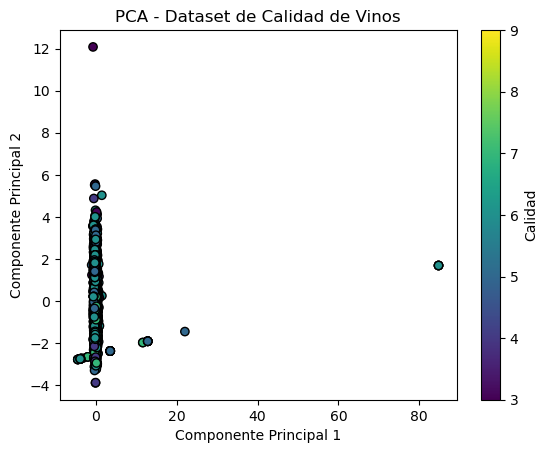

In [105]:
# Visualizar las componentes principales
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=white['quality'], cmap='viridis', edgecolor='k')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Dataset de Calidad de Vinos")
plt.colorbar(label="Calidad")
plt.show()